In [ ]:
import numpy as num
import pandas as pud
import matplotlib.pyplot as ploty
import seaborn as sb

## Company Selection and problems releated to the company

An Adidas US retail business that mainly specializes in selling footwear related products and other accessories has been chosen in which EDA analysis will be performed to address business issues. Therefore, this company includes data scientists that help to analyze the company's previous records and provide better solutions regarding the company's future development (McLean, 2020). By implementing data scientists as well as EDA techniques, Adidas US retail stores can easily analyze their consumers data or gain insights into consumers behavior, payment methods, payment types and other details that helps the company to make better choices in developing future products. Apart from that, the dataset contains different types of columns such as region, global sales, sales methods and many more, for which data scientists easily analyze the company's dataset and predict the future outcomes. On the other hand, EDA analysis can also assist the Adidas organization in locating potential cost-saving measures, such as reducing procedures or selecting better suppliers (Arora, Srivastava and Bansal, 2020). Moreover, this data is also utilized by the data scientists in order to evaluate the performance of other stores as well as pinpoint areas for development.

## Data exploration

In [ ]:
addidas_us=pud.read_excel("Adidas US Sales Datasets.xlsx")

In [ ]:
addidas_us.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


#### Prepare a clean dataset by droppping unncessary columns

In [ ]:
# deletin Unnamed: 0 column from the dataset
addidas_us = addidas_us.drop('Unnamed: 0',axis=1)
# delete rows [0, 1, 2]
addidas_us= addidas_us.drop(labels=[0,1,2], axis=0)
# Craete dataset new column name by copy the row 0.
addidas_us.columns = addidas_us.iloc[0]
addidas_us = addidas_us.drop(labels=3, axis=0)
addidas_us = addidas_us.reset_index(drop=True)

In [ ]:
addidas_us.head(n=5)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [ ]:
addidas_us.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

## Start Data Preprocessing

In [ ]:
# identifing null values from the dataset
addidas_us.fillna(0, inplace=True)
addidas_us.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
addidas_us.describe()

3,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [ ]:
addidas_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
# utilize astype () for converting object type data to integer type that helps to calcuate mean and othetr values of the columns
addidas_us[['Price per Unit', 'Total Sales',
            'Operating Profit', 'Operating Margin']] = addidas_us[['Price per Unit', 'Total Sales',
                            'Operating Profit', 'Operating Margin']].astype(str).astype(float)

addidas_us[['Units Sold']] = addidas_us[['Units Sold']].astype(str).astype(int)

In [ ]:
addidas_us.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
addidas_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int32         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(6)
memory usage: 

Text(0.5, 1.0, 'Scatter plot between Price per Unit / Units Sold')

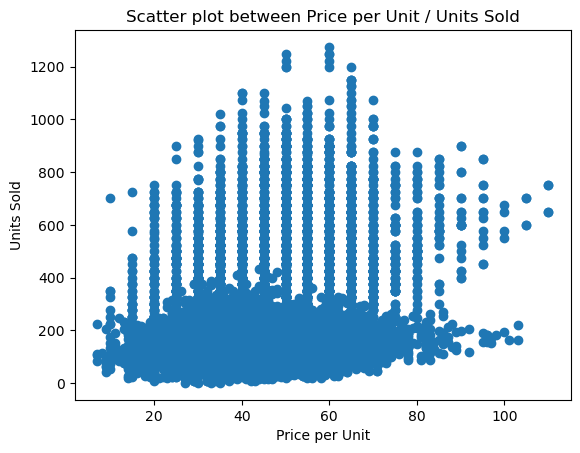

In [ ]:
# Scatter plot for displaying relation of price per unit as well as units sold
ploty.scatter(addidas_us['Price per Unit'], addidas_us['Units Sold'])
ploty.xlabel('Price per Unit')
ploty.ylabel('Units Sold')
ploty.title('Scatter plot between Price per Unit / Units Sold')

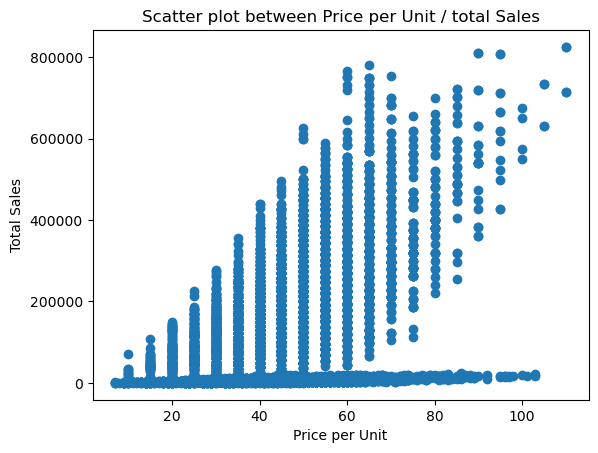

In [ ]:
# Scatter plot for displaying relation of price per unit as well as total sales of addidas company
ploty.scatter(addidas_us['Price per Unit'], addidas_us['Total Sales'])
ploty.xlabel('Price per Unit')
ploty.ylabel('Total Sales')
ploty.title('Scatter plot between Price per Unit / total Sales')
ploty.show()

Scatter plot is generated with the use of price_per_unit column and total sales to check the correlation between the variables. Moreover, “ploty.scatter ()” function is applied here to create the plots. Therefore, this assists to represent the correlation between the two variables as well as  can help Adidas to discover new patterns or trends in their sales data. From the graph, it can be said that there is a positive relation for both variables as shows indicates that when price per unit expands, the number of units sold also expands (Pratisti and Paramitasari, 2023). For this reason, it helps to choose correct decision regarding companies future development.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

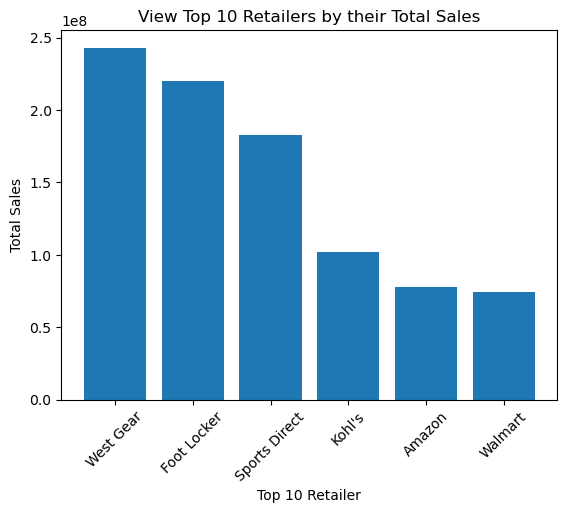

In [ ]:
retailer_10_top = addidas_us.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False).head(10)
ploty.bar(retailer_10_top.index, retailer_10_top.values)
ploty.title('View Top 10 Retailers by their Total Sales')
ploty.xlabel('Top 10 Retailer')
ploty.ylabel('Total Sales')
ploty.xticks(rotation=45)

The top 10 retailers by total sales have been examined by the adidas company with the use of this code. It averages the Total Sales values for each retailer as well as groups the data from the addidas_us dataframe according to the Retailer column. The top 10 retailers are then determined by sorting the data in descending order. The top 10 retailers' combined sales are then displayed in a bar chart made with ploty by the code being used. It allows the adidas organization in figuring out which retailers are performing the best and where to concentrate on advertising campaigns.

Text(0.5, 1.0, 'Addidas operating Margin by Product')

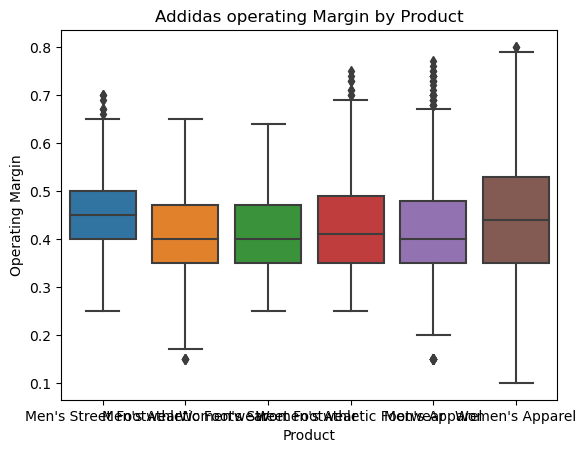

In [ ]:
# Box plot of operating margin by addidas product
sb.boxplot(x='Product', y='Operating Margin', data=addidas_us)
ploty.title('Addidas operating Margin by Product')

## Data Anaysis Part and business Questions

### Business Question 1: How does the sales method affect the total sales of Adidas products?

Text(0, 0.5, 'Total Sales')

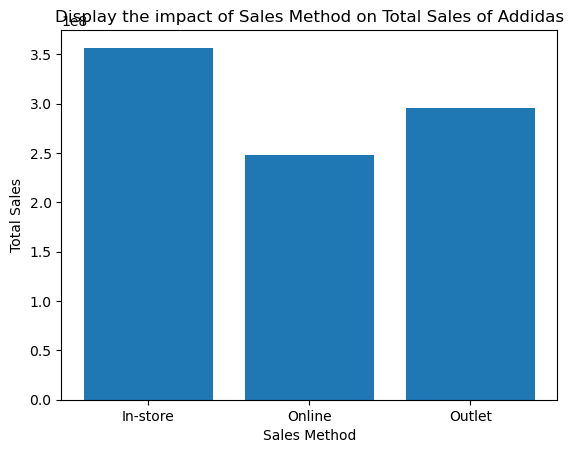

In [ ]:
# Here, this code is applied to calculate total sales for every sales method
TotalSales_type=addidas_us.groupby('Sales Method')['Total Sales'].sum().reset_index()
ploty.bar(TotalSales_type['Sales Method'],TotalSales_type['Total Sales'])
ploty.title('Display the impact of Sales Method on Total Sales of Addidas')
ploty.xlabel('Sales Method')
ploty.ylabel('Total Sales')

The total sales of each payment method has been calculated by using the above codes. In this case, the  groupby() method utilizes to make a sales group the by sales method, and then it sums the total sales for each group. The ploty.bar() method is applied in order to visualize the impact of sales method on total sales of Adidas in a bar chart. Therefore, it can be said that in-store payment methods' sales rate is greater with respect to online outlets. Further, the sales method determines how many products are sold and via what channels, and this has an impact on the overall sales of Adidas products (Geetha, Al-Khaled and Fenn, 2020). The Adidas company may employ this information to better understand which strategies result in the most sales and to decide whether to improve their sales strategy. In addition, they may utilize this data to locate areas for development in order to boost revenues.

### Business Question 2: What is the average price per unit for Addidas products sold in different cities?

Text(0.5, 1.0, 'Average Price per Unit for Products Sold in Different Cities')

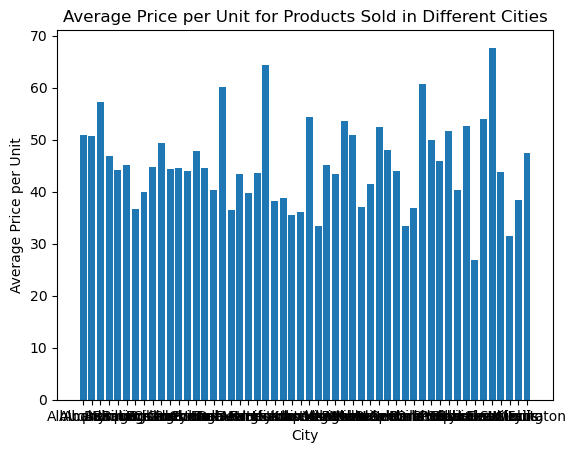

In [ ]:
# Create City Group
city_group = addidas_us.groupby('City')
# here, calculate the average price per unit for every city
average_price_per_unit_sale = city_group['Price per Unit'].mean()
ploty.bar(average_price_per_unit_sale.index, average_price_per_unit_sale.values)
ploty.xlabel('City')
ploty.ylabel('Average Price per Unit')
# Set the graph title
ploty.title('Average Price per Unit for Products Sold in Different Cities')

In this case, this code assists to build a city group from the addidas_us data frame as well as calculates the average price per unit for each city. After that, it applies a bar graph in order to display the average price per unit for each city. From the bar charts, it has been visualized the each cities average price per unit rates for which data scientists can make decision regarding the product sales and other details. Further, this makes it easier for the Adidas company in determining which cities are linked with greater unit pricing whereas other cities are linked to cheaper unit costs (Modi et al. 2022). Price adjustments may then be implemented in order to increase earnings using this information. In addition, it improves the company's awareness of price trends in various cities or may guide marketing plans.

### Business Question 3: What is the trend of Total Sales and Operating Profit of Adidas products in different regions?

C:\Users\MrNobody\AppData\Local\Temp\ipykernel_15344\726850561.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_trend = addidas_us.groupby('Region')['Total Sales', 'Operating Profit'].sum().plot(kind='bar', color=['blue', 'red'])


Text(0.5, 1.0, 'Total Sales / Operating Profit of Adidas Products by Region')

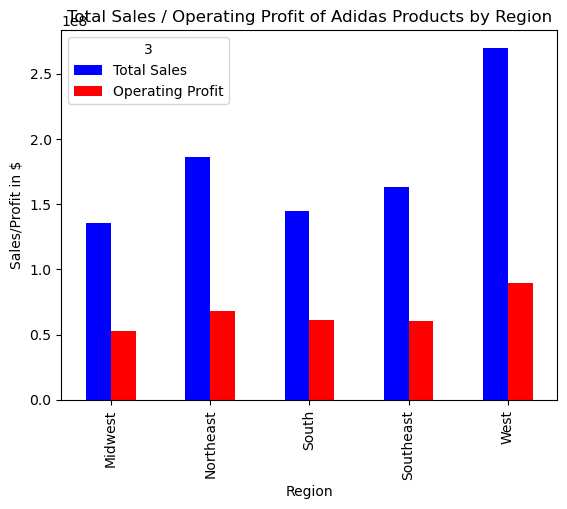

In [ ]:
sales_trend = addidas_us.groupby('Region')['Total Sales', 'Operating Profit'].sum().plot(kind='bar', color=['blue', 'red'])

sales_trend.set_xlabel('Region')
sales_trend.set_ylabel('Sales/Profit in $')
sales_trend.set_title('Total Sales / Operating Profit of Adidas Products by Region')

This code generates a bar chart for displaying the total sales as well as operating profits of Adidas products by region. Different color codes are applied here to understand better about the graphs. It can summarised that west region product sales rate is greater as commpared to the other region. Adidas must verify the issues of other region an try to solve the issues to increase the comapnies sales margin. The following chart also enables the Adidas Company to determine which regions are contributing the majority of sales and earnings as well as which regions have the potential to contribute more sales and profits (Li, 2022). Analyzing and recognizing any significant performance differences across various locations also helpful. Adidas is able to optimize its sales and earnings by doing this by making well-informed decisions regarding how to use its assets.

### Business Question 4: How does the Operating Profit of Adidas products vary by region?

<AxesSubplot:title={'center':'Display Operating Profit of Addidas products by Region'}, xlabel='Region'>

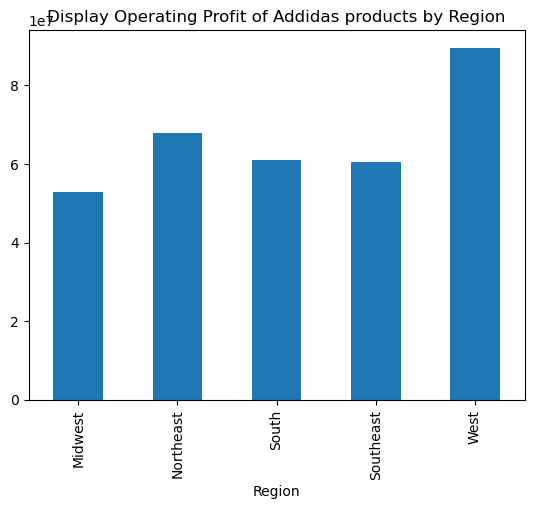

In [ ]:
addidas_us.groupby('Region')['Operating Profit'].sum().plot(kind='bar',
                                                            title='Display Operating Profit of Addidas products by Region')

In order to create the bar charts for operating profits vs region, the above codes are considered. Moreover, this assists the Adidas organization in examining the profitability of their goods across different countries. It enables the business to determine which regions are the most valuable or that require additional money or effort. Making decisions on strategies for advertising as well as product development can be accomplished by employing this knowledge. The bar graph offers a simple visual representation of the data, enabling the business to analyze the situation and make decisions swiftly.

Apart from that, the operating profit of Adidas products varies by area dependent on the local market dynamics, purchasing power, and economic climate. Therfore, Adidas products typically have better operating profits in regions with richer populations as well as greater purchasing power (Li, 2022). The above graphs helps to find out the richer region and company product more products in this region. Further, the Operating Profit of Adidas goods may be lower in regions with lower incomes. The performance of Adidas products in a certain area can also be influenced by the existence of rival brands there as well as the company's level of marketing there.

### Business Question 5: What is the correlation between Units Sold and Total Sales of Addidas products?

Text(0, 0.5, 'Total Sales')

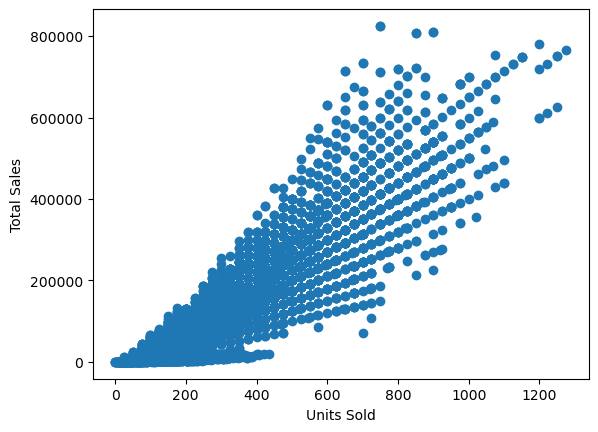

In [ ]:
ploty.scatter(addidas_us['Units Sold'], addidas_us['Total Sales'])
ploty.xlabel('Units Sold')
ploty.ylabel('Total Sales')

This program utilizes the Ploty library to generate a scatter plot of the addidas_us dataset's Units Sold as well as Total Sales data. The Adidas organization can use this scatter plot to find any relationships between the two variables that might shed light on their operational issue.  Therefore, the plot shows that there is a positive correlation between the Units sold and total salas of Adidas products. For which, Company can make correct decision about their products price ranges and otherby analysing the correlation between different variables.

### Business Question 6: What is the average operating margin for each product sold by Adidas across all retailers?

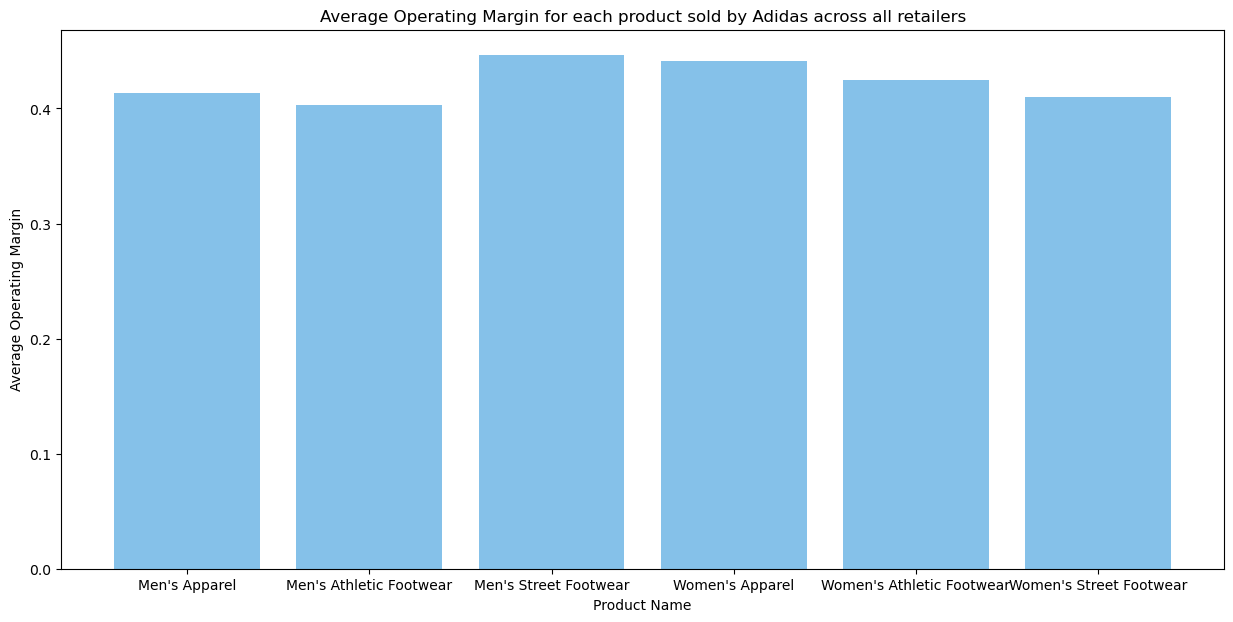

In [ ]:
sales_average_margin = addidas_us.groupby("Product")["Operating Margin"].mean()
ploty.figure(figsize=(15,7))
ploty.bar(sales_average_margin.index, sales_average_margin.values, color="#85C1E9")
ploty.xlabel("Product Name")
ploty.ylabel("Average Operating Margin")
ploty.title("Average Operating Margin for each product sold by Adidas across all retailers")
ploty.show()

The follwoing codes are applied here for determining the average operating margin of each product sold by Adidas over all retailers. In this case, it calculates the average operating margin for each product by utilizing the “groupby ()” function of the addidas_us dataframe. After that, it creates a bar graph of the average operating margins for each product with Ploty function. This graph permits Adidas in order to reprresent the average operating margins for each product they sell, also enabling them to detects which products are most profitable and which products may required to be adjusted for increasing their margins (Baroi and De, 2021). Adidas can make more effective choices using this information on what things to sell and how to price them to generate the most revenue.

## Business Question 7: What is the most popular product sold by each retailer?

In [ ]:
# Retailer and product Group created here
most_popular_product = addidas_us.groupby(['Retailer', 'Product'])['Units Sold'].sum().reset_index().sort_values(['Retailer',
                                    'Units Sold'], ascending=[True, False]).drop_duplicates(subset=['Retailer'])

# view the most popular product sold by each retailer
print(most_popular_product[['Retailer', 'Product', 'Units Sold']])

         Retailer                Product  Units Sold
2          Amazon  Men's Street Footwear       54883
8     Foot Locker  Men's Street Footwear      159081
14         Kohl's  Men's Street Footwear       66844
20  Sports Direct  Men's Street Footwear      124879
26        Walmart  Men's Street Footwear       41980
32      West Gear  Men's Street Footwear      145653


The following python codes useful here that assists to view the most popular products sold by the each retailers. It helps Adidas to discover the which retailers have large market area and company deliver more products to the retailers that increase the companies sales performance. The result has been shown after executing the task in the table format.

## Conlusion

It can be concluded that the EDA analysis has been performed with the help of python programming as well a adidas us retail sales dataset. It provides the insight details of Adidas companies sales performances, business problems and others. Multiple types of busines questions are perform through EDA analysis for which Adidas can comprehend about their current marke trends, profits margins and many more.